## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Case

#### Fill in information about: 
- Stakeholder
- Situation
- Problem to solve

# Approach / Method of Analysis

#### Data Analysis
- Types of models and tools to use
- Source data
 - King County Housing Data
 - King County Housing Agency 
      - Subsidy Payment Tiers by Zip Code - https://www.kcha.org/documents/63.pdf
      - Broadband Survey - https://www.arcgis.com/apps/dashboards/4bcf7c77ecac475eb467e9df0028d05b
      - Impact of Broadband on housing prices - Study: https://realtorparty.realtor/community-outreach/rural-outreach-initiative/news-resources/impact-of-broadband
- Predictive variable(s)

# Import Tools

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.stats import norm

# Import Data

In [175]:
df_housing = pd.read_csv('Data/kc_house_data.csv')
df_grade = pd.read_csv('/Users/Dolant98/Downloads/Report_Card_Graduation_201415.csv')
df_address = pd.read_csv('/Users/Dolant98/Downloads/Washington_Education_District.csv')


Housing Data Column Descriptions

##### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


001	Seattle
210	Federal Way
216	Enumclaw
400	Mercer Island
401	Highline
402	Vashon Island
403	Renton
404	Skykomish
405	Bellevue
406	Tukwila
407	Riverview
408	Auburn
409	Tahoma
410	Snoqualmie Valley
411	Issaquah
412	Shoreline
414	Lake Washington
415	Kent
417	Northshore
888	Fife

## Housing Data

In [176]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [164]:
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [177]:
df_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [178]:
print(df_housing.nunique())

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64


## King County School Graduation Rates

In [179]:
df_grade.head()

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,...,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate,DataAsOf
0,2015,County,Franklin,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,23.0,18.0,3.0,2.0,0.7826,12/14/2020 12:00:00 AM
1,2015,County,Grant,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,3.0,47.0,32.0,11.0,4.0,0.6809,12/14/2020 12:00:00 AM
2,2015,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,3318.0,1770.0,NaN,12392.0,78148.0,62948.0,1118.0,14082.0,0.8055,12/14/2020 12:00:00 AM
3,2015,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,3066.0,1453.0,743.0,12803.0,82444.0,64418.0,77.0,17949.0,0.7814,12/14/2020 12:00:00 AM
4,2015,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,NaN,NaN,NaN,11809.0,76077.0,59483.0,7516.0,9078.0,0.7819,12/14/2020 12:00:00 AM


In [180]:
df_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78246 entries, 0 to 78245
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SchoolYear              78246 non-null  int64  
 1   OrganizationLevel       78246 non-null  object 
 2   County                  78246 non-null  object 
 3   ESDName                 73511 non-null  object 
 4   ESDOrganizationId       76918 non-null  float64
 5   DistrictCode            73805 non-null  float64
 6   DistrictName            74745 non-null  object 
 7   DistrictOrganizationId  77306 non-null  float64
 8   SchoolCode              53760 non-null  float64
 9   SchoolName              74745 non-null  object 
 10  SchoolOrganizationId    57261 non-null  float64
 11  StudentGroupType        78246 non-null  object 
 12  StudentGroup            78246 non-null  object 
 13  Suppression             78246 non-null  object 
 14  Cohort                  78246 non-null

In [168]:
df_grade.describe()

,SchoolYear,ESDOrganizationId,DistrictCode,DistrictOrganizationId,SchoolCode,SchoolOrganizationId,BegginingGrade9,TransferIn,Year1Dropout,Year2Dropout,...,Year4Dropout,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate
count,78246.0,76918.000000,73805.000000,77306.000000,53760.000000,57261.000000,33136.000000,30980.000000,14450.000000,19067.000000,...,27070.000000,18398.000000,8611.000000,2770.000000,34179.000000,34179.000000,34179.000000,34179.000000,34179.000000,39333.000000
mean,2015.0,95453.365298,22464.217790,95661.753861,3339.223251,96266.038455,411.360665,79.175533,12.402907,11.500656,...,31.563982,23.171377,15.246545,10.483032,62.158314,408.402499,328.344129,14.270605,65.787764,0.739437
std,0.0,20844.515694,10357.188099,20839.904666,1222.880840,24610.778507,2785.643160,521.686721,70.231152,61.273257,...,193.879121,138.116258,80.458465,46.764757,430.705763,2805.088941,2257.510486,143.475156,470.462900,0.207091
min,2015.0,0.000000,1109.000000,0.000000,1500.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016400
25%,2015.0,100003.000000,17001.000000,100075.000000,2283.000000,101123.000000,21.000000,5.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,20.000000,11.000000,0.000000,3.000000,0.666700
50%,2015.0,100006.000000,22009.000000,100150.000000,3236.000000,102149.000000,69.000000,15.000000,2.000000,2.000000,...,6.000000,4.000000,3.000000,2.000000,10.000000,66.000000,46.000000,1.000000,10.000000,0.811300
75%,2015.0,100007.000000,31201.000000,100231.000000,4295.000000,103194.000000,218.250000,39.000000,6.000000,5.000000,...,15.000000,11.000000,7.000000,5.000000,31.000000,216.000000,181.000000,4.000000,28.000000,0.882400
max,2015.0,100009.000000,39209.000000,105800.000000,5957.000000,105812.000000,80568.000000,17865.000000,2371.000000,1917.000000,...,5894.000000,3863.000000,1854.000000,780.000000,13053.000000,85374.000000,66843.000000,8048.000000,18452.000000,0.990000


## Zipcode Data by School District

In [181]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ESDCode            320 non-null    object
 1   ESDName            320 non-null    object
 2   DistrictCode       320 non-null    int64 
 3   DistrictName       320 non-null    object
 4   AddressLine1       320 non-null    object
 5   AddressLine2       9 non-null      object
 6   City               320 non-null    object
 7   State              320 non-null    object
 8   Zipcode            320 non-null    object
 9   AdministratorName  320 non-null    object
 10  Phone              310 non-null    object
 11  Email              310 non-null    object
dtypes: int64(1), object(11)
memory usage: 30.1+ KB


In [170]:
df_address.head()

,ESDCode,ESDName,DistrictCode,DistrictName,AddressLine1,AddressLine2,City,State,Zipcode,AdministratorName,Phone,Email
0,34801,Capital Region ESD 113,14005,Aberdeen School District,216 N G ST,NaN,ABERDEEN,Washington,98520-5297,Alicia Henderson,(360)538-2002,ahenderson@asd5.org
1,34801,Capital Region ESD 113,21226,Adna School District,PO BOX 118,NaN,ADNA,Washington,98522-0118,James Forrest,(360)748-0362,forrestj@adnaschools.org
2,32801,Educational Service District 101,22017,Almira School District,PO BOX 217,NaN,ALMIRA,Washington,99103-0217,Shauna L Schmerer,(509)639-2414,sschmerer@almirasd.org
3,29801,Northwest Educational Service District 189,29103,Anacortes School District,2200 M AVE,NaN,ANACORTES,Washington,98221-3794,Mark Wenzel,(360)503-1211,Mwenzel@asd103.org
4,29801,Northwest Educational Service District 189,31016,Arlington School District,315 N FRENCH AVE,NaN,ARLINGTON,Washington,98223-1317,Chrys Sweeting,(360)618-6200,csweeting@asd.wednet.edu


In [182]:
df_county_grade.head()

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,...,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate,DataAsOf
817,2015,School,King,Puget Sound Educational Service District 121,100006.0,17408.0,Auburn School District,100016.0,5037.0,Auburn Mountainview High School,...,NaN,NaN,NaN,52.0,386.0,361.0,13.0,12.0,0.9352,12/14/2020 12:00:00 AM
910,2015,School,King,Puget Sound Educational Service District 121,100006.0,17408.0,Auburn School District,100016.0,4474.0,Auburn Riverside High School,...,NaN,NaN,NaN,33.0,369.0,308.0,38.0,23.0,0.8347,12/14/2020 12:00:00 AM
1003,2015,School,King,Puget Sound Educational Service District 121,100006.0,17408.0,Auburn School District,100016.0,2795.0,Auburn Senior High School,...,NaN,NaN,NaN,45.0,338.0,254.0,40.0,44.0,0.7515,12/14/2020 12:00:00 AM
1153,2015,School,King,Puget Sound Educational Service District 121,100006.0,17408.0,Auburn School District,100016.0,2702.0,West Auburn Senior High School,...,NaN,NaN,NaN,7.0,133.0,11.0,42.0,80.0,0.0827,12/14/2020 12:00:00 AM
1893,2015,School,King,Puget Sound Educational Service District 121,100006.0,17405.0,Bellevue School District,100019.0,2701.0,Bellevue High School,...,NaN,NaN,NaN,56.0,367.0,334.0,17.0,16.0,0.9101,12/14/2020 12:00:00 AM


### Data Frame Modifications

#### Changing zip code in df_housing to string.  This is for the purpose of merging the housing and address dataframes on zip code.  

In [183]:
df_housing['zipcode'] = df_housing['zipcode'].astype(str)

In [184]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  float64
 18  long  

In [185]:
df_housing['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [208]:
df_address['zipcode'] = df_address['Zipcode'].str[:5]

In [209]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ESDCode            320 non-null    object
 1   ESDName            320 non-null    object
 2   DistrictCode       320 non-null    int64 
 3   DistrictName       320 non-null    object
 4   AddressLine1       320 non-null    object
 5   AddressLine2       9 non-null      object
 6   City               320 non-null    object
 7   State              320 non-null    object
 8   Zipcode            320 non-null    object
 9   AdministratorName  320 non-null    object
 10  Phone              310 non-null    object
 11  Email              310 non-null    object
 12  zipcode            320 non-null    object
dtypes: int64(1), object(12)
memory usage: 32.6+ KB


#### Creating a subset of school grades

In [210]:
df_county_grade = df_grade[(df_grade['OrganizationLevel'] == "School") & (df_grade['StudentGroup'] == "All Students") & (df_grade['County'] == "King") & (df_grade['Suppression'] == "No Suppression") & \
(df_grade['Cohort'] == "Four Year")]


In [211]:
len(df_county_grade)

83

In [212]:
df_county_grade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 817 to 49745
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SchoolYear              83 non-null     int64  
 1   OrganizationLevel       83 non-null     object 
 2   County                  83 non-null     object 
 3   ESDName                 81 non-null     object 
 4   ESDOrganizationId       81 non-null     float64
 5   DistrictCode            83 non-null     float64
 6   DistrictName            83 non-null     object 
 7   DistrictOrganizationId  83 non-null     float64
 8   SchoolCode              83 non-null     float64
 9   SchoolName              83 non-null     object 
 10  SchoolOrganizationId    83 non-null     float64
 11  StudentGroupType        83 non-null     object 
 12  StudentGroup            83 non-null     object 
 13  Suppression             83 non-null     object 
 14  Cohort                  83 non-null    

### Merging Files

#### The steps below outline the process for merging datasets:
 1. Merge the county_grade and address dataframes by district code to obtain zip code.  
 2. Merge the new dataframe with the housing data by zip code in order to associate graduation rate with the housing data

In [213]:
df_county_grade_wzip = pd.merge(df_county_grade,df_address, how = 'left', on = 'DistrictCode')

In [214]:
df_county_grade_wzip

,SchoolYear,OrganizationLevel,County,ESDName_x,ESDOrganizationId,DistrictCode,DistrictName_x,DistrictOrganizationId,SchoolCode,SchoolName,...,DistrictName_y,AddressLine1,AddressLine2,City,State,Zipcode,AdministratorName,Phone,Email,zipcode
0,2015,School,King,Puget Sound Educational Service District 121,100006.0,17408.0,Auburn School District,100016.0,5037.0,Auburn Mountainview High School,...,Auburn School District,915 4TH ST NE,NaN,AUBURN,Washington,98002-4452,Alan Spicciati,(253)931-4914,aspicciati@auburn.wednet.edu,98002
1,2015,School,King,Puget Sound Educational Service District 121,100006.0,17408.0,Auburn School District,100016.0,4474.0,Auburn Riverside High School,...,Auburn School District,915 4TH ST NE,NaN,AUBURN,Washington,98002-4452,Alan Spicciati,(253)931-4914,aspicciati@auburn.wednet.edu,98002
2,2015,School,King,Puget Sound Educational Service District 121,100006.0,17408.0,Auburn School District,100016.0,2795.0,Auburn Senior High School,...,Auburn School District,915 4TH ST NE,NaN,AUBURN,Washington,98002-4452,Alan Spicciati,(253)931-4914,aspicciati@auburn.wednet.edu,98002
3,2015,School,King,Puget Sound Educational Service District 121,100006.0,17408.0,Auburn School District,100016.0,2702.0,West Auburn Senior High School,...,Auburn School District,915 4TH ST NE,NaN,AUBURN,Washington,98002-4452,Alan Spicciati,(253)931-4914,aspicciati@auburn.wednet.edu,98002
4,2015,School,King,Puget Sound Educational Service District 121,100006.0,17405.0,Bellevue School District,100019.0,2701.0,Bellevue High School,...,Bellevue School District,PO BOX 90010,NaN,BELLEVUE,Washington,98005-3183,Ivan Duran,(425)456-4025,durani@bsd405.org,98005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2015,School,King,Puget Sound Educational Service District 121,100006.0,17410.0,Snoqualmie Valley School District,100240.0,2850.0,Mount Si High School,...,Snoqualmie Valley School District,PO BOX 400,NaN,SNOQUALMIE,Washington,98065-0400,Robert W Manahan,(425)831-8000,manahanr@svsd410.org,98065
79,2015,School,King,Puget Sound Educational Service District 121,100006.0,17410.0,Snoqualmie Valley School District,100240.0,1502.0,Two Rivers School,...,Snoqualmie Valley School District,PO BOX 400,NaN,SNOQUALMIE,Washington,98065-0400,Robert W Manahan,(425)831-8000,manahanr@svsd410.org,98065
80,2015,School,King,Puget Sound Educational Service District 121,100006.0,17409.0,Tahoma School District,100263.0,2849.0,Tahoma Senior High School,...,Tahoma School District,25720 MAPLE VALLEY BLK DIAM RD,NaN,MAPLE VALLEY,Washington,98038-8313,,NaN,NaN,98038
81,2015,School,King,Puget Sound Educational Service District 121,100006.0,17406.0,Tukwila School District,100243.0,2848.0,Foster Senior High School,...,Tukwila School District,4640 S 144TH ST,NaN,TUKWILA,Washington,98168-4134,Lester Herndon,(206)901-8000,herndonf@tukwila.wednet.edu,98168


In [215]:
len(df_county_grade_wzip)

83

In [217]:
df_housing_wgrade = df_housing.join(zipcode) append `numbers` to `df1`
pd.merge(df_housing, df_county_grade_wzip, how = 'left', on = 'zipcode')

In [205]:
df_housing_wgrade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30437 entries, 0 to 30436
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30437 non-null  int64  
 1   date                    30437 non-null  object 
 2   price                   30437 non-null  float64
 3   bedrooms                30437 non-null  int64  
 4   bathrooms               30437 non-null  float64
 5   sqft_living             30437 non-null  int64  
 6   sqft_lot                30437 non-null  int64  
 7   floors                  30437 non-null  float64
 8   waterfront              27103 non-null  object 
 9   view                    30361 non-null  object 
 10  condition               30437 non-null  object 
 11  grade                   30437 non-null  object 
 12  sqft_above              30437 non-null  int64  
 13  sqft_basement           30437 non-null  object 
 14  yr_built                30437 non-null

In [156]:
df_housing_wgrade['GraduationRate'].value_counts()

0.9007    589
0.7647    508
0.8562    446
0.8457    446
0.4800    351
0.8984    321
0.5250    321
0.9606    321
0.9275    321
0.9694    308
0.3077    308
0.9392    282
0.3333    280
0.1860    280
0.8032    280
0.8249    280
0.7756    280
0.7995    280
0.0164    273
0.3814    273
0.7671    273
0.8467    273
0.8994    273
0.7105    273
0.8110    273
0.6996    269
0.8537    254
0.8500    254
0.7143    254
0.5978    254
0.8727    254
0.1833    254
0.7051    254
0.6633    254
0.0752    254
0.6846    254
0.8304    233
0.7515    199
0.0827    199
0.8347    199
0.9352    199
0.9471    190
0.3571    190
0.9478    168
0.8770    168
0.8589    168
0.9101    168
0.9593    117
Name: GraduationRate, dtype: int64

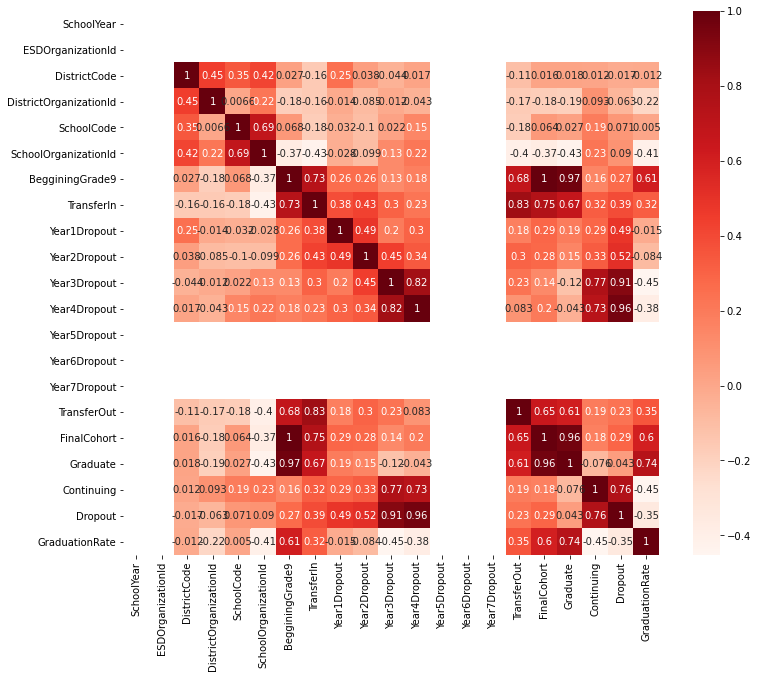

In [206]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_county_grade_wzip.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Train Test Split

In [ ]:
y = df_county_grade_wzip.price
X = df_county_grade_wzip[['bedrooms', 'sqft_living']]

# Here is the convention for a traditional train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)